# Análise Exploratória dos Microdados do ENEM

### Análise de desempenho por escolaridade da mãe em escolas particulares do Ceará

imports

In [153]:
import pandas as pd

carregamento do conjunto de dados

In [154]:
df = pd.read_csv('/home/victor/code/datasets/enem/completo_sem_gab.csv', sep=';', encoding='ISO-8859-1', index_col=0)
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


Seleção de colunas, tipo de escola e estado

In [155]:
colunas_selecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'Q002', 'SG_UF_ESC', 'TP_ESCOLA']
df = df.filter(items=colunas_selecionadas).where(df.TP_ESCOLA == 3).where(df.SG_UF_ESC == 'CE')
df = df.dropna() # drop das linhas com valores nulos
df.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,Q002,SG_UF_ESC,TP_ESCOLA
583,2.000048e+11,903.9,960.0,798.9,723.4,723.1,E,CE,3.0
2526,2.000012e+11,489.3,320.0,453.7,538.4,415.2,B,CE,3.0
9883,2.000054e+11,851.2,940.0,745.0,730.1,695.7,G,CE,3.0
10713,2.000015e+11,639.6,680.0,563.9,580.6,480.8,E,CE,3.0
12797,2.000061e+11,518.8,680.0,578.2,536.7,558.5,E,CE,3.0


Total de candidatos

In [156]:
df.NU_INSCRICAO.count()

5981

inclusão de coluna para nota final (média das notas)

In [157]:
df['NOTA_FINAL'] = df.filter(items=['NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN']).mean(axis=1)
df.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,Q002,SG_UF_ESC,TP_ESCOLA,NOTA_FINAL
583,2.000048e+11,903.9,960.0,798.9,723.4,723.1,E,CE,3.0,821.86
2526,2.000012e+11,489.3,320.0,453.7,538.4,415.2,B,CE,3.0,443.32
9883,2.000054e+11,851.2,940.0,745.0,730.1,695.7,G,CE,3.0,792.40
10713,2.000015e+11,639.6,680.0,563.9,580.6,480.8,E,CE,3.0,588.98
12797,2.000061e+11,518.8,680.0,578.2,536.7,558.5,E,CE,3.0,574.44


Dicionário das respostas ao questionário socioeconômico

In [158]:
question_dict = {
    'A':	'Nunca estudou.',
    'B':	'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C':	'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D':	'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E':	'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F':	'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G':	'Completou a Pós-graduação.',
    'H':	'Não sei.'
}

Inclusão da coluna com as respostas de acordo com o dicionário

In [159]:
df['NO_Q002'] = [question_dict[resp] for resp in df.Q002]
df.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,Q002,SG_UF_ESC,TP_ESCOLA,NOTA_FINAL,NO_Q002
583,2.000048e+11,903.9,960.0,798.9,723.4,723.1,E,CE,3.0,821.86,"Completou o Ensino Médio, mas não completou a ..."
2526,2.000012e+11,489.3,320.0,453.7,538.4,415.2,B,CE,3.0,443.32,Não completou a 4ª série/5º ano do Ensino Fund...
9883,2.000054e+11,851.2,940.0,745.0,730.1,695.7,G,CE,3.0,792.40,Completou a Pós-graduação.
10713,2.000015e+11,639.6,680.0,563.9,580.6,480.8,E,CE,3.0,588.98,"Completou o Ensino Médio, mas não completou a ..."
12797,2.000061e+11,518.8,680.0,578.2,536.7,558.5,E,CE,3.0,574.44,"Completou o Ensino Médio, mas não completou a ..."


Distribuição dos candidatos por escolaridade da Mãe

In [160]:
df.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",2061
Completou a Pós-graduação.,1708
"Completou a Faculdade, mas não completou a Pós-graduação.",1506
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",372
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",162
Não sei.,87
Não completou a 4ª série/5º ano do Ensino Fundamental.,76
Nunca estudou.,9


Text(0.05, 0.6, 'A : Nunca estudou.\nB : Não completou a 4ª série/5º ano do Ensino Fundamental.\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\nE : Completou o Ensino Médio, mas não completou a Faculdade.\nF : Completou a Faculdade, mas não completou a Pós-graduação.\nG : Completou a Pós-graduação.\nH : Não sei.')

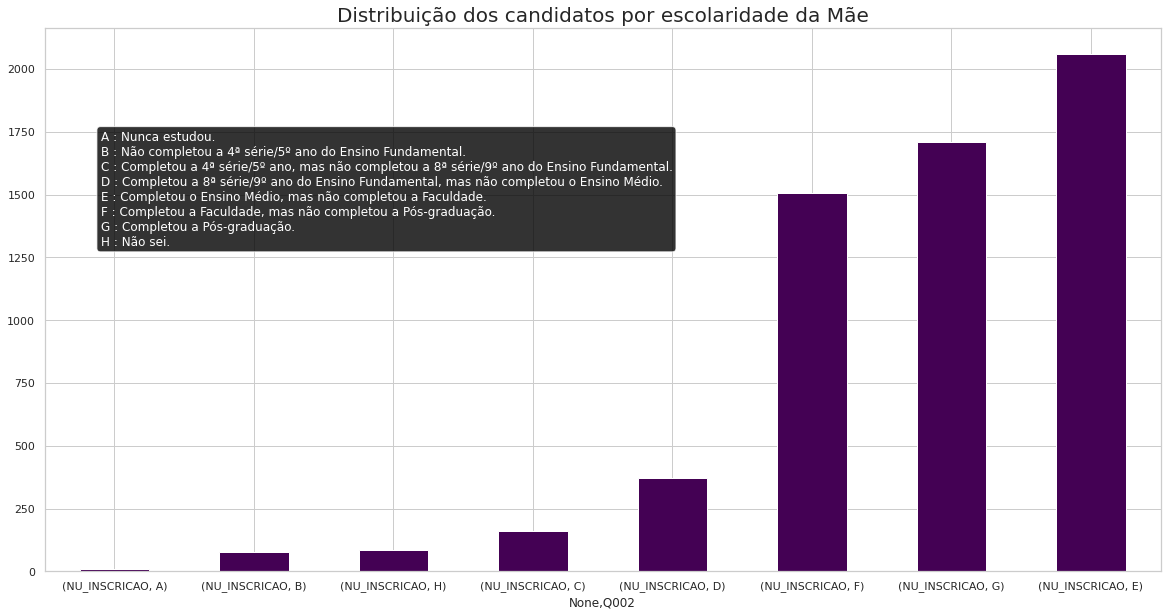

In [161]:
ax = df.filter(items=['NU_INSCRICAO', 'Q002']).groupby('Q002').count().sort_values(by='NU_INSCRICAO', ascending=True)\
    .unstack().plot.bar(figsize=(20,10), colormap='viridis', rot=0, x='Q002', y='NU_INSCRICAO')

ax.set_title('Distribuição dos candidatos por escolaridade da Mãe', fontsize=20)

text_dict = ''
for key, value in question_dict.items():
    text_dict = text_dict + f'{key} : {value}\n'
text_dict=text_dict[:-1]

ax.text(0.05, 0.60, text_dict, transform=ax.transAxes, fontsize=12, color='white',
    bbox={'boxstyle':'round', 'facecolor':'black', 'alpha':0.8})


Desempenho em Redação segundo a escolaridade da Mãe

In [162]:
df.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,798.512881
"Completou a Faculdade, mas não completou a Pós-graduação.",774.448871
"Completou o Ensino Médio, mas não completou a Faculdade.",747.316836
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",739.247312
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",724.444444
Não sei.,717.241379
Não completou a 4ª série/5º ano do Ensino Fundamental.,708.421053
Nunca estudou.,635.555556


Text(1.01, 0, 'A : Nunca estudou.\nB : Não completou a 4ª série/5º ano do Ensino Fundamental.\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\nE : Completou o Ensino Médio, mas não completou a Faculdade.\nF : Completou a Faculdade, mas não completou a Pós-graduação.\nG : Completou a Pós-graduação.\nH : Não sei.')

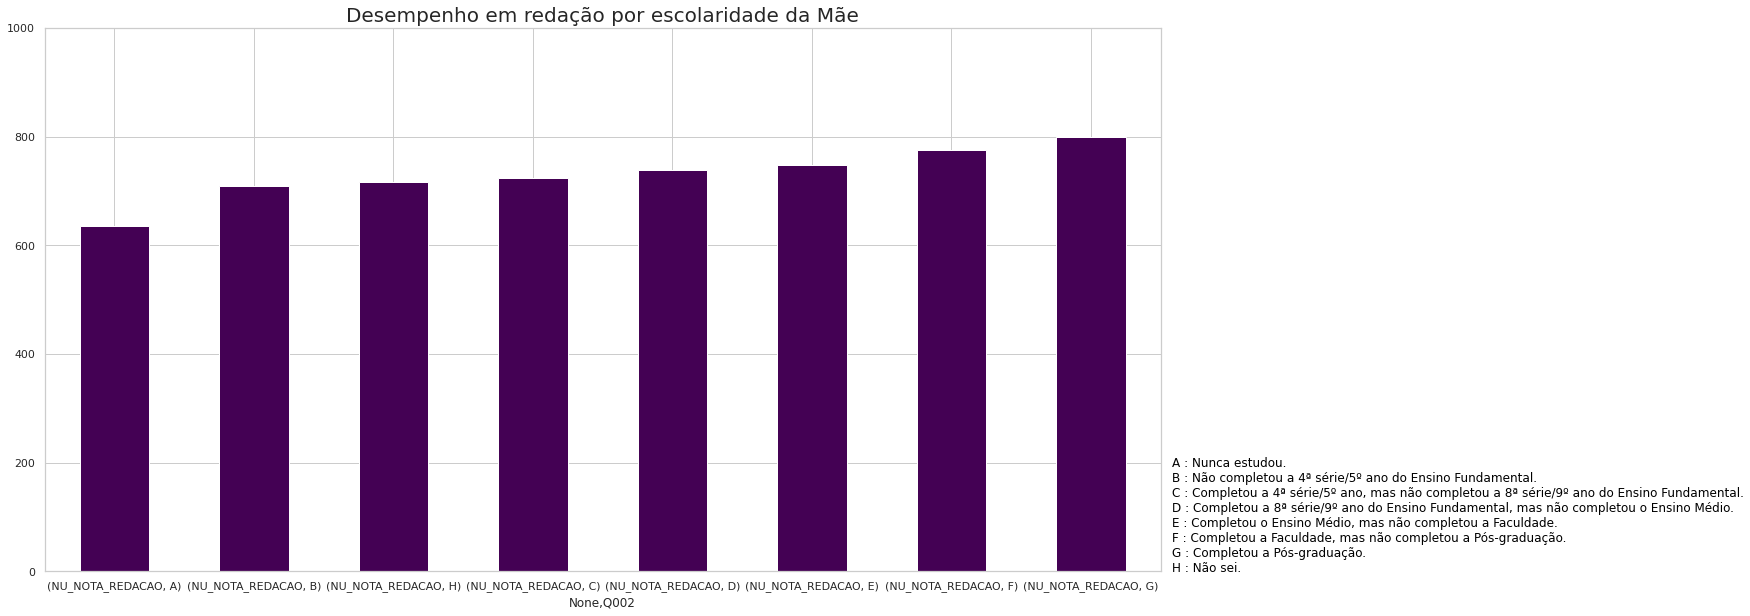

In [163]:
ax = df.filter(items=['NU_NOTA_REDACAO', 'Q002']).groupby('Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=True)\
    .unstack().plot.bar(figsize=(20,10), colormap='viridis', rot=0, x='Q002', y='NU_INSCRICAO')

ax.set_title('Desempenho em redação por escolaridade da Mãe', fontsize=20)

ax.set_ylim([0, 1000])

ax.text(1.01, 0, text_dict, transform=ax.transAxes, fontsize=12, color='black',
    bbox={'boxstyle':'round', 'facecolor':'white', 'alpha':0.8})


Desempenho médio segundo a escolaridade da Mãe

In [164]:
df.filter(items=['NOTA_FINAL', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NOTA_FINAL', ascending=False)

,NOTA_FINAL
NO_Q002,
Completou a Pós-graduação.,641.705562
"Completou a Faculdade, mas não completou a Pós-graduação.",631.302696
"Completou o Ensino Médio, mas não completou a Faculdade.",605.830209
Não sei.,598.019770
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",592.347796
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",584.621852
Não completou a 4ª série/5º ano do Ensino Fundamental.,573.300263
Nunca estudou.,549.213333


Text(1.01, 0, 'A : Nunca estudou.\nB : Não completou a 4ª série/5º ano do Ensino Fundamental.\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\nE : Completou o Ensino Médio, mas não completou a Faculdade.\nF : Completou a Faculdade, mas não completou a Pós-graduação.\nG : Completou a Pós-graduação.\nH : Não sei.')

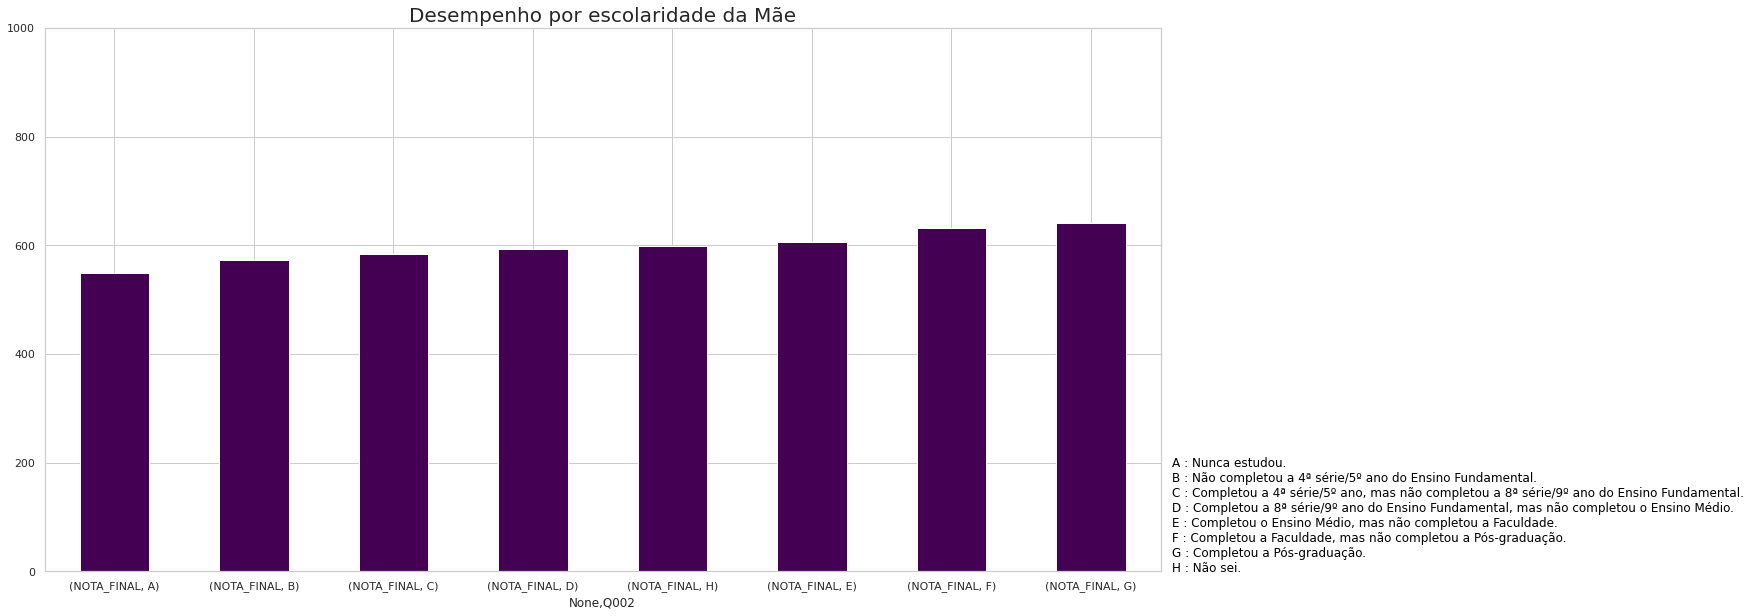

In [165]:
ax = df.filter(items=['NOTA_FINAL', 'Q002']).groupby('Q002').mean().sort_values(by='NOTA_FINAL', ascending=True)\
    .unstack().plot.bar(figsize=(20,10), colormap='viridis', rot=0, x='Q002', y='NU_INSCRICAO')

ax.set_title('Desempenho por escolaridade da Mãe', fontsize=20)

ax.set_ylim([0, 1000])

ax.text(1.01, 0, text_dict, transform=ax.transAxes, fontsize=12, color='black',
    bbox={'boxstyle':'round', 'facecolor':'white', 'alpha':0.8})


Estatística descritiva

In [166]:
df.filter(items=['NO_Q002','NOTA_FINAL']).groupby('NO_Q002').describe()

NOTA_FINAL              \
                                                        count        mean   
NO_Q002                                                                     
Completou a 4ª série/5º ano, mas não completou ...      162.0  584.621852   
Completou a 8ª série/9º ano do Ensino Fundament...      372.0  592.347796   
Completou a Faculdade, mas não completou a Pós-...     1506.0  631.302696   
Completou a Pós-graduação.                             1708.0  641.705562   
Completou o Ensino Médio, mas não completou a F...     2061.0  605.830209   
Nunca estudou.                                            9.0  549.213333   
Não completou a 4ª série/5º ano do Ensino Funda...       76.0  573.300263   
Não sei.                                                 87.0  598.019770   

                                                                       \
                                                          std     min   
NO_Q002                                                                 
Completou a 4ª série/5º ano, mas não completou ...  95.238718  286.24   
Completou a 8ª série/9º ano do Ensino Fundament...  86.910505  369.46   
Completou a Faculdade, mas não completou a Pós-...  86.946237  218.80   
Completou a Pós-graduação.                          85.388361  209.94   
Completou o Ensino Médio, mas não completou a F...  86.139552  310.88   
Nunca estudou.                                      95.195069  440.62   
Não completou a 4ª série/5º ano do Ensino Funda...  73.723984  396.78   
Não sei.                                            97.464411  392.78   

                                                                              \
                                                        25%     50%      75%   
NO_Q002                                                                        
Completou a 4ª série/5º ano, mas não completou ...  522.875  598.55  652.810   
Completou a 8ª série/9º ano do Ensino Fundament...  526.555  596.03  660.185   
Completou a Faculdade, mas não completou a Pós-...  574.995  640.73  695.155   
Completou a Pós-graduação.                          589.205  650.25  703.730   
Completou o Ensino Médio, mas não completou a F...  545.640  613.48  668.900   
Nunca estudou.                                      483.220  537.54  577.460   
Não completou a 4ª série/5º ano do Ensino Funda...  533.950  578.15  621.680   
Não sei.                                            520.240  620.52  678.290   

                                                            
                                                       max  
NO_Q002                                                     
Completou a 4ª série/5º ano, mas não completou ...  775.04  
Completou a 8ª série/9º ano do Ensino Fundament...  802.36  
Completou a Faculdade, mas não completou a Pós-...  835.02  
Completou a Pós-graduação.                          835.40  
Completou o Ensino Médio, mas não completou a F...  828.24  
Nunca estudou.                                      723.96  
Não completou a 4ª série/5º ano do Ensino Funda...  761.90  
Não sei.                                            753.12